# Regression with Linear Algebra - Lab

## Introduction

In this lab, we shall apply regression analysis using simple matrix manipulations to fit a model to given data, and then predict new values for previously unseen data. We shall follow the approach highlighted in previous lesson where we used numpy to build the appropriate matrices and vectors and solve for the $\beta$ (unknown variables) vector. The beta vector will be used with test data to make new predictions. We shall also evaluate how good our model fit was. 

In order to make this experiment interesting. We shall use NumPy at every single stage of this experiment i.e. loading data, creating matrices, performing test train split, model fitting and evaluations.  

## Objectives

You will be able to:

* Use linear algebra to apply simple regression modeling in Python and NumPy only
* Apply train/test split using permutations in NumPy
* Use matrix algebra with inverses and dot products to calculate the beta
* Make predictions from the fitted model using previously unseen input features 
* Evaluate the fitted model by calculating the error between real and predicted values


First let's import necessary libraries 

In [1]:
import csv # for reading csv file
import numpy as np

## Dataset 

The dataset we will use for this experiment is "**Sales Prices in the City of Windsor, Canada**", something very similar to the Boston Housing dataset. This dataset contains a number of input (independent) variables, including area, number of bedrooms/bathrooms, facilities(AC/garage) etc. and an output (dependent) variable, **price**. We shall formulate a linear algebra problem to find linear mappings from input to out features using the equation provided in the previous lesson. 

This will allow us to find a relationship between house features and house price for the given data, allowing us to find unknown prices for houses, given the input features.  

A description of dataset and included features is available at [THIS LINK](https://rdrr.io/cran/Ecdat/man/Housing.html)

In your repo, the dataset is available as `windsor_housing.csv` containing following variables:

there are 11 input features (first 11 columns):

	lotsize	bedrooms	bathrms	stories	driveway	recroom	fullbase	gashw	airco	garagepl	prefarea

and 1 output feature i.e. **price** (12th column). 

The focus of this lab is not really answering a preset analytical question, but to learn how we can perform a regression experiment, similar to one we performed in statsmodels, using mathematical manipulations. So we we wont be using any Pandas or statsmodels goodness here. The key objectives here are to a) understand regression with matrix algebra, and b) Mastery in NumPy scientific computation. 

## Stage 1: Prepare Data for Modeling 

Let's give you a head start by importing the dataset. We shall perform following steps to get the data ready for analysis:

* Initialize an empty list `data` for loading data
* Read the csv file containing complete (raw) `windsor_housing.csv`. [Use `csv.reader()` for loading data.](https://docs.python.org/3/library/csv.html). Store this in `data` one row at a time.

* Drop the first row of csv file as it contains the names of variables (header) which won't be used during analysis (keeping this will cause errors as it contains text values).

* Append a column of all 1s to the data (bias) as the first column

* Convert `data` to a numpy array and inspect first few rows 

NOTE: `read.csv()` would read the csv as a text file, so we must convert the contents to float at some stage. 

In [15]:
data = [] #set up an empty list for the data (x and y values)

with open ('windsor_housing.csv') as file:
    raw = csv.reader(file)

raw

In [16]:
with open ('windsor_housing.csv') as file:
    raw = csv.reader(file)
    next(raw) # Drop the very first line as it contains names for columns - not actual data
    for row in raw:
        ones = [1.0] #Append a column of all 1s to the data (bias) as the first column
        for r in row:
            ones.append(float(r))
                # Append the row to data 
        data.append(ones)

data#print first column

[[1.0, 5850.0, 3.0, 1.0, 2.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 42000.0],
 [1.0, 4000.0, 2.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 38500.0],
 [1.0, 3060.0, 3.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 49500.0],
 [1.0, 6650.0, 3.0, 1.0, 2.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 60500.0],
 [1.0, 6360.0, 2.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 61000.0],
 [1.0, 4160.0, 3.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 66000.0],
 [1.0, 3880.0, 3.0, 2.0, 2.0, 1.0, 0.0, 1.0, 0.0, 0.0, 2.0, 0.0, 66000.0],
 [1.0, 4160.0, 3.0, 1.0, 3.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 69000.0],
 [1.0, 4800.0, 3.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 83800.0],
 [1.0, 5500.0, 3.0, 2.0, 4.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 88500.0],
 [1.0, 7200.0, 3.0, 2.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 3.0, 0.0, 90000.0],
 [1.0, 3000.0, 2.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 30500.0],
 [1.0, 1700.0, 3.0, 1.0, 2.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 27000.0],
 [1.0, 2880.0, 3.0, 1.0, 

In [17]:
data = np.array(data)
data[:5,:]

array([[1.00e+00, 5.85e+03, 3.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 1.00e+00, 0.00e+00,
        4.20e+04],
       [1.00e+00, 4.00e+03, 2.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        3.85e+04],
       [1.00e+00, 3.06e+03, 3.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        4.95e+04],
       [1.00e+00, 6.65e+03, 3.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        6.05e+04],
       [1.00e+00, 6.36e+03, 2.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        6.10e+04]])

## Step 2: Perform a 80/20 test train Split

Explore NumPy's official documentation to manually split a dataset using `numpy.random.shuffle()`,  `numpy.random.permutations()` or using simple resampling method. 
* Perform a **RANDOM** 80/20 split on data using a method of your choice , in NumPy using one of the methods above. 
* Create x_test, y_test, x_train and y_train arrays from the split data.
* Inspect the contents to see if the split performed as expected. 

In [21]:
len(data)

546

In [28]:
# Your code here 
#1. Perform a RANDOM 80/20 split on data
training_index =np.random.randint(data.shape[0], size =round(546*.8))
training_index[0:15]#generating rand integers for the index numbers that will make up the trains and tests



array([ 44, 162, 459, 407, 418,  56, 343,  29, 212, 389, 130, 292, 382,
       208, 468])

In [29]:
test_index = np.random.randint(data.shape[0], size =round(546*.2))
test_index[0:15]#generating rand integers

array([114,  12,  77, 194, 243,  95,   3, 263,  70,  63,  59, 238, 164,
       298, 109])

In [31]:
len(training_index)+len(test_index) == len(data)

True

In [34]:
training, test = data[training_index,:], data[test_index,:]
len(training)

437

In [35]:
#2. Check the shape of datasets
print ('Raw data Shape: ', data.shape)
print ('Train/Test Split:', training.shape, test.shape)


Raw data Shape:  (546, 13)
Train/Test Split: (437, 13) (109, 13)


In [44]:
# 3.Create x_test, y_test, x_train and y_train arrays from the split data.
x_train = training[:,:-1]
y_train = training [:,-1]
x_test = test[:,:-1]
y_test = test[:,-1]

In [45]:
x_train.shape #x train is the matrix with all the features

(437, 12)

In [46]:
y_train.shape #y train is a vector with only the last column as its data

(437,)

In [47]:
# Check the shape of datasets
print ('x_train, y_train, x_test, y_test:', x_train.shape, y_train.shape, x_test.shape, y_test.shape)

# Split results

# Raw data Shape:  (546, 13)
# Train/Test Split: (437, 13) (109, 13)
# x_train, y_train, x_test, y_test: (437, 12) (437,) (109, 12) (109,)

x_train, y_train, x_test, y_test: (437, 12) (437,) (109, 12) (109,)


## Step 3: Calculate the `beta` 

With our X and y in place, We can now compute our beta values with x_train and y_train as:
#### $\beta$ = (x_train<sup>T</sup> . x_train)<sup>-1</sup> . x_train<sup>T</sup> . y_train 

* Using numpy operations (transpose, inverse) that we saw earlier, compute the above equation in steps.
* Print your beta values

In [50]:
Xt = np.transpose(x_train)
XtX = np.dot(Xt,x_train)
Xty = np.dot(Xt,y_train)

# Calculate inverse of Xt.X
XtX_inv = np.linalg.inv(XtX)

# Take the dot product of XtX_inv with Xty to compute beta
beta = XtX_inv.dot(Xty)

beta

array([6.88403236e+02, 3.39126287e+00, 1.40053323e+03, 1.15654121e+04,
       7.78120250e+03, 5.90449161e+03, 3.96443049e+03, 5.73763021e+03,
       1.64923662e+04, 1.08479471e+04, 3.52105125e+03, 8.73354742e+03])

## Step 4: Make Predictions
Great , we now have a set of coefficients that describe the linear mappings between X and y. We can now use the calculated beta values  with the test datasets that we left out to calculate y predictions. 
For this we need to perform the following tasks:

Now we shall all features in each row in turn and multiply it with the beta computed above. The result will give a prediction for each row which we can append to a new array of predictions.

#### $\hat{y}$ = x.$\beta$ = $\beta$<sub>0</sub> + $\beta$<sub>1</sub> . x<sub>1</sub> + $\beta$<sub>2</sub> . x<sub>2</sub> + .. + $\beta$<sub>m</sub> . x<sub>m</sub>


* Create new empty list (y_pred) for saving predictions.
* For each row of x_test, take the dot product of the row with beta to calculate the prediction for that row.
* Append the predictions to y_pred.
* Print the new set of predictions.

In [51]:
# Your code here 
#1. Create new empty list (y_pred) for saving predictions.
y_pred = []

#2.For each row of x_test, take the dot product of the row with beta to calculate the prediction for that row.
for row in x_test:
    pred = row.dot(beta)
    y_pred.append(pred) #3. Append the predictions to y_pred.

y_pred #4.Print the new set of predictions.


[78010.57160303011,
 43687.458512710946,
 66692.63807601051,
 39524.79183344337,
 41115.29412118268,
 51801.16343603675,
 64438.640223776434,
 42441.27790477771,
 49669.899860243066,
 54268.19867848204,
 46061.34252426215,
 51694.09722309538,
 64828.55655435379,
 47222.95855661657,
 51159.872367438715,
 31992.494045815056,
 58234.36741220833,
 85836.17763235181,
 81511.83427363032,
 43656.27039940684,
 50823.578343813286,
 96094.79199845836,
 93840.34169114429,
 46788.49033607656,
 75393.22936694801,
 53524.91215867251,
 56167.83970087388,
 72829.52299503869,
 34003.45459259331,
 96111.12100948406,
 55008.414370800936,
 88035.19868563052,
 75935.83142673115,
 41312.604808454744,
 95129.16609203986,
 73185.39668427773,
 92078.12564420325,
 59536.47539185073,
 110828.98962797476,
 74250.89775080796,
 75432.56271252918,
 58529.46561950839,
 62196.282834489575,
 77797.67893159631,
 61196.49039204494,
 96111.12100948406,
 73328.83553173329,
 52182.51367389764,
 60339.706575230695,
 46788.49

## Step 5: Evaluate Model 

### Visualize Actual vs. Predicted
This is exciting, so now our model can use the beta value to predict the price of houses given the input features. Let's plot these predictions against the actual values in y_test to see how much our model deviates. 

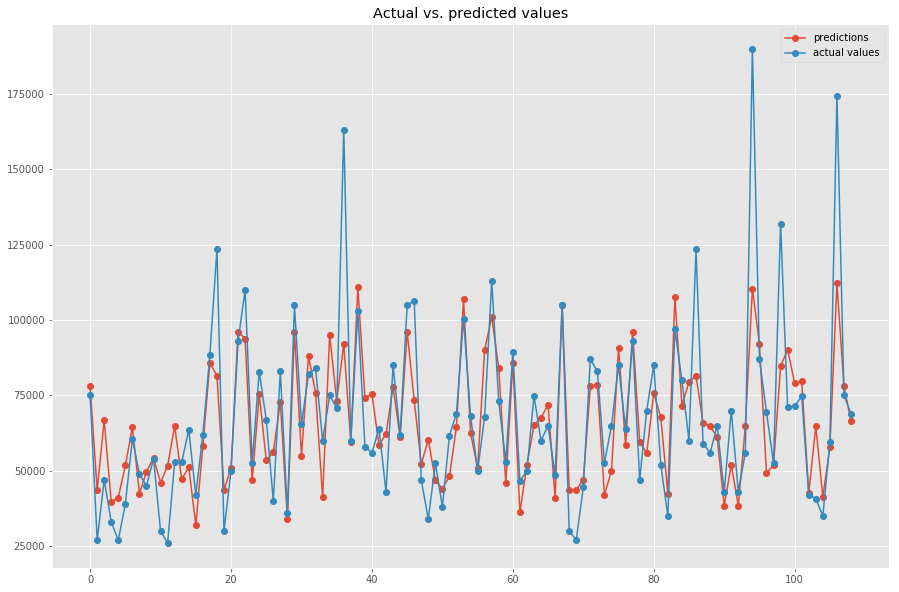

In [53]:
# Plot predicted and actual values as line plots
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10
plt.style.use('ggplot')

plt.plot(y_pred, linestyle='-', marker='o', label='predictions')
plt.plot(y_test, linestyle='-', marker='o', label='actual values')
plt.title('Actual vs. predicted values')
plt.legend()
plt.show()


![](diff.png)

This doesn't look so bad, does it ? Our model, although isn't perfect at this stage, is making a good attempt to predict house prices although a few prediction seem a bit out. There could a number of reasons for this. Let's try to dig a bit deeper to check model's predictive abilities by comparing these prediction with actual values of y_test individually. That will help us calculate the RMSE value (Root Mean Squared Error) for our model. 
### Root Mean Squared Error
Here is the formula for this again. 

![](rmse.jpg)


* Initialize an empty array `err`.
* for each row in y_test and y_pred, take the squared difference and append error for each row in err array. 
* Calculate RMSE from `err` using the formula shown above. 

In [7]:
# 1.Initialize an empty array err.
err = []

#2.for each row in y_test and y_pred, take the squared difference and append error for each row in err array
for pred,actual in zip(y_pred,y_test):
    sq

Calculate RMSE from err using the formula shown above.

# Due to random split, your answers may vary 

# RMSE = 16401.913562758735

### Normalized Root Mean Squared Error
The above error is clearly in terms of the dependant variable i.e. the final house price. We can also use a normlized mean squared error in case of multiple regression which can be calculated from RMSE using following formula:

* Calculate normalized Root Mean Squared Error

<img src="nrmse.png" width=300>

In [11]:
# Calculate NRMSE

# Due to random split, your answers may vary 

# 0.09940553674399233

0.09940553674399233

SO there it is. A complete multiple regression analysis using nothing but numpy. Having good programming skills in numpy would allow to dig deeper into analytical algorithms in machine learning and deep learning. Using matrix multiplication techniques we saw here, we can easily build a whole neural network from scratch. 

## Level up - Optional 

* Calculated the R_squared and adjusted R_squared for above experiment. 
* Plot the residuals (similar to statsmodels) and comment on the variance and heteroscedascticity. 
* Run the experiment in statsmodels and compare the performance of both approaches in terms of computational cost.

## Summary

So there we have it. A predictive model for predicting house prices in a given dataset. Remember this is a very naive implementation of regression modeling. The purpose here was to get an introduction to the applications of linear algebra into machine learning and predictive analysis. We still have a number of shortcomings in our modeling approach and we can further apply a number of data modeling techniques to improve this model. 